In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("scoutium_attributes.csv", sep=";")  
labels = pd.read_csv("scoutium_potential_labels.csv", sep=";") 

In [4]:
data.columns

Index(['task_response_id', 'match_id', 'evaluator_id', 'player_id',
       'position_id', 'analysis_id', 'attribute_id', 'attribute_value'],
      dtype='object')

In [5]:
labels.columns

Index(['task_response_id', 'match_id', 'evaluator_id', 'player_id',
       'potential_label'],
      dtype='object')

In [6]:
df = pd.merge(data,labels, how='left', on = ['task_response_id', 'match_id', 'evaluator_id', 'player_id'])

In [7]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,average
1,4915,62935,177676,1361061,2,12818495,4323,56.000,average
2,4915,62935,177676,1361061,2,12818495,4324,67.000,average
3,4915,62935,177676,1361061,2,12818495,4325,56.000,average
4,4915,62935,177676,1361061,2,12818495,4326,45.000,average


In [8]:
df = df[df["position_id"] != 1]

In [9]:
df["position_id"].value_counts()/df["position_id"].count()

2    0.197
6    0.142
10   0.108
8    0.102
7    0.098
3    0.098
4    0.088
9    0.085
5    0.081
Name: position_id, dtype: float64

In [10]:
df.potential_label.value_counts()

average          7922
highlighted      1972
below_average     136
Name: potential_label, dtype: int64

In [11]:
df = df[df["potential_label"] != "below_average"]

In [12]:
df_ = pd.pivot_table(df, values = "attribute_value", columns = "attribute_id", index  = ["player_id", "position_id", "potential_label"])
df_.head()

attribute_id                            4322   4323   4324   4325   4326  \
player_id position_id potential_label                                      
1355710   7           average         50.500 50.500 34.000 50.500 45.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         67.000 67.000 67.000 67.000 67.000   
          4           average         67.000 78.000 67.000 67.000 67.000   
1356411   9           average         67.000 67.000 78.000 78.000 67.000   

attribute_id                            4327   4328   4329   4330   4332  \
player_id position_id potential_label                                      
1355710   7           average         45.000 45.000 45.000 50.500 56.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         67.000 67.000 78.000 67.000 67.000   
          4           average         78.000 78.000 78.000 56.000 67.000   
1356411   9           average         67.000 67.000 67.000 89.000 78.000   

attribute_id                            4333   4335   4338   4339   4340  \
player_id position_id potential_label                                      
1355710   7           average         39.500 34.000 39.500 39.500 45.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         78.000 56.000 67.000 67.000 67.000   
          4           average         67.000 67.000 78.000 78.000 56.000   
1356411   9           average         67.000 67.000 67.000 56.000 56.000   

attribute_id                            4341   4342   4343   4344   4345  \
player_id position_id potential_label                                      
1355710   7           average         45.000 50.500 28.500 23.000 39.500   
1356362   9           average         67.000 67.000 67.000 56.000 67.000   
1356375   3           average         67.000 67.000 56.000 56.000 67.000   
          4           average         67.000 67.000 45.000 45.000 56.000   
1356411   9           average         67.000 78.000 56.000 56.000 67.000   

attribute_id                            4348   4349   4350   4351   4352  \
player_id position_id potential_label                                      
1355710   7           average         28.500 28.500 45.000 50.500 56.000   
1356362   9           average         67.000 56.000 67.000 67.000 67.000   
1356375   3           average         67.000 56.000 56.000 67.000 67.000   
          4           average         67.000 67.000 67.000 67.000 78.000   
1356411   9           average         56.000 67.000 56.000 67.000 67.000   

attribute_id                            4353   4354   4355   4356   4357  \
player_id position_id potential_label                                      
1355710   7           average         34.000 39.500 50.500 34.000 34.000   
1356362   9           average         67.000 78.000 67.000 67.000 67.000   
1356375   3           average         67.000 78.000 67.000 67.000 67.000   
          4           average         67.000 67.000 67.000 56.000 67.000   
1356411   9           average         56.000 67.000 67.000 56.000 67.000   

attribute_id                            4407   4408   4423   4426  
player_id position_id potential_label                              
1355710   7           average         56.000 34.000 34.000 56.000  
1356362   9           average         67.000 67.000 56.000 78.000  
1356375   3           average         67.000 67.000 56.000 78.000  
          4           average         56.000 67.000 45.000 56.000  
1356411   9           average         89.000 56.000 67.000 78.000

In [13]:
_ = df_.reset_index(drop=False)
_.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,average,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,average,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000


In [14]:
_.columns

Index([      'player_id',     'position_id', 'potential_label',
                    4322,              4323,              4324,
                    4325,              4326,              4327,
                    4328,              4329,              4330,
                    4332,              4333,              4335,
                    4338,              4339,              4340,
                    4341,              4342,              4343,
                    4344,              4345,              4348,
                    4349,              4350,              4351,
                    4352,              4353,              4354,
                    4355,              4356,              4357,
                    4407,              4408,              4423,
                    4426],
      dtype='object', name='attribute_id')

In [15]:
_.columns = _.columns.map(str)

In [16]:
dff = _.copy()

In [17]:
dff["potential_label"] = LabelEncoder().fit_transform(dff["potential_label"])
dff.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,0,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,0,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,0,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,0,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000


In [18]:
num_cols = dff.columns[3:]
num_cols

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330',
       '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343',
       '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354',
       '4355', '4356', '4357', '4407', '4408', '4423', '4426'],
      dtype='object', name='attribute_id')

In [19]:
dff[num_cols] = StandardScaler().fit_transform(dff[num_cols])
dff.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,-0.543,-0.559,-1.405,-0.438,-0.767,-0.795,-0.907,-0.792,-0.446,-0.123,-1.224,-1.036,-1.126,-1.009,-0.542,-0.690,-0.535,-1.067,-1.206,-1.005,-1.314,-1.042,-0.693,-0.436,0.013,-1.282,-1.132,-0.495,-1.235,-1.520,-0.143,-1.487,-0.955,-0.253
1,1356362,9,0,0.595,0.561,0.679,0.683,0.723,0.723,0.601,0.404,0.728,0.691,0.459,0.996,0.632,0.840,0.912,0.799,0.588,1.230,0.750,0.742,0.879,0.670,0.848,0.717,0.787,0.814,1.053,0.632,0.915,0.768,0.530,0.669,0.404,1.042
2,1356375,3,0,0.595,0.561,0.679,0.683,0.723,0.723,0.601,1.002,0.728,0.691,1.132,0.319,0.632,0.840,0.912,0.799,0.588,0.574,0.750,0.742,0.879,0.670,0.077,0.717,0.787,0.814,1.053,0.632,0.915,0.768,0.530,0.669,0.404,1.042
3,1356375,4,0,0.595,1.308,0.679,0.683,0.723,1.482,1.355,1.002,-0.055,0.691,0.459,0.996,1.335,1.580,0.185,0.799,0.588,-0.083,0.098,0.043,0.879,1.355,0.848,0.717,1.560,0.814,0.428,0.632,0.198,0.768,-0.143,0.669,-0.276,-0.253
4,1356411,9,0,0.595,0.561,1.373,1.430,0.723,0.723,0.601,0.404,2.294,1.505,0.459,0.996,0.632,0.101,0.185,0.799,1.337,0.574,0.750,0.742,0.252,1.355,0.077,0.717,0.787,0.115,0.428,0.632,0.198,0.768,1.874,-0.050,1.083,1.042


In [20]:
y = dff["potential_label"]
X = dff.drop(["potential_label", "player_id"], axis = 1)

models = [('LR', LogisticRegression()),
                ('KNN', KNeighborsClassifier()),
                ("SVC", SVC()),
                ("CART", DecisionTreeClassifier()),
                ("RF", RandomForestClassifier()),
                ('Adaboost', AdaBoostClassifier()),
                ('GBM', GradientBoostingClassifier()),
                ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                ('CatBoost', CatBoostClassifier(verbose=False)),
                ("LightGBM", LGBMClassifier())]


In [23]:
for name, model in models:
    print(name)
    for score in ["roc_auc", "f1", "precision", "recall", "accuracy"]:
        cvs = cross_val_score(model, X, y, scoring=score, cv=10).mean()
        print(score+" score:"+str(cvs))
    print(end="\n")

LR
roc_auc score:0.8452886002886002
f1 score:0.5684648684648684
precision score:0.7738095238095238
recall score:0.49000000000000005
accuracy score:0.8525132275132276

KNN
roc_auc score:0.7256998556998557
f1 score:0.4278571428571428
precision score:0.775
recall score:0.30999999999999994
accuracy score:0.8449735449735449

SVC
roc_auc score:0.8439105339105339
f1 score:0.03333333333333334
precision score:0.1
recall score:0.02
accuracy score:0.797089947089947

CART
roc_auc score:0.7310389610389612
f1 score:0.5356943056943057
precision score:0.5867460317460318
recall score:0.6066666666666667
accuracy score:0.808068783068783

RF
roc_auc score:0.9103751803751804
f1 score:0.5678860028860029
precision score:0.9666666666666666
recall score:0.4533333333333333
accuracy score:0.8855820105820106

Adaboost
roc_auc score:0.8647474747474746
f1 score:0.5938455988455988
precision score:0.7971428571428572
recall score:0.5433333333333333
accuracy score:0.8560846560846562

GBM
roc_auc score:0.873816738816738

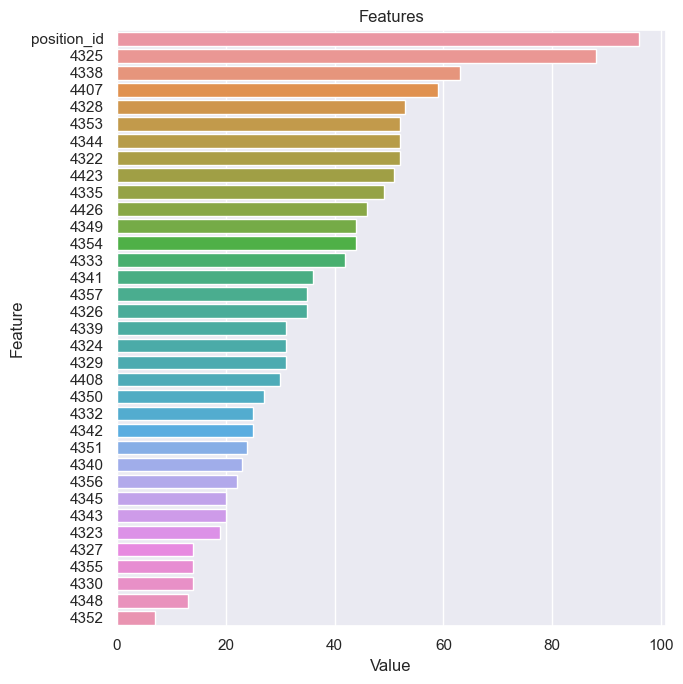

In [24]:
# feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMClassifier()
model.fit(X, y)

plot_importance(model, X)

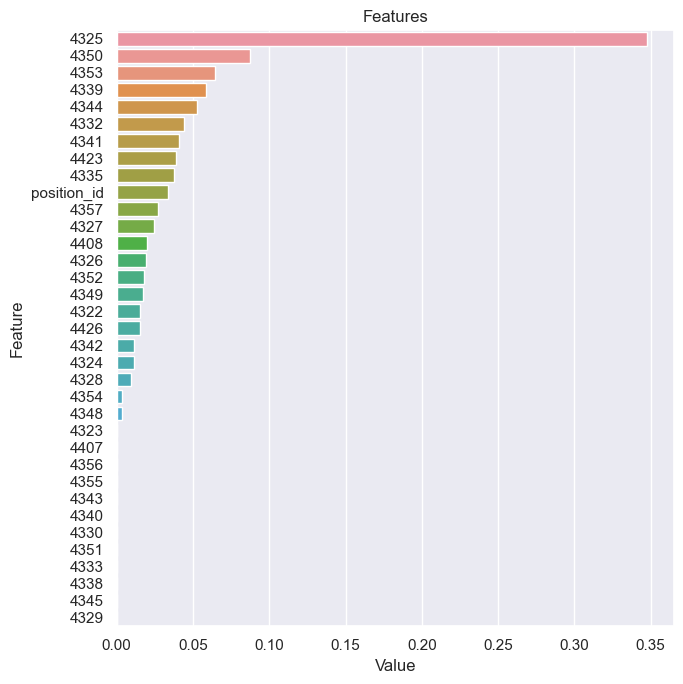

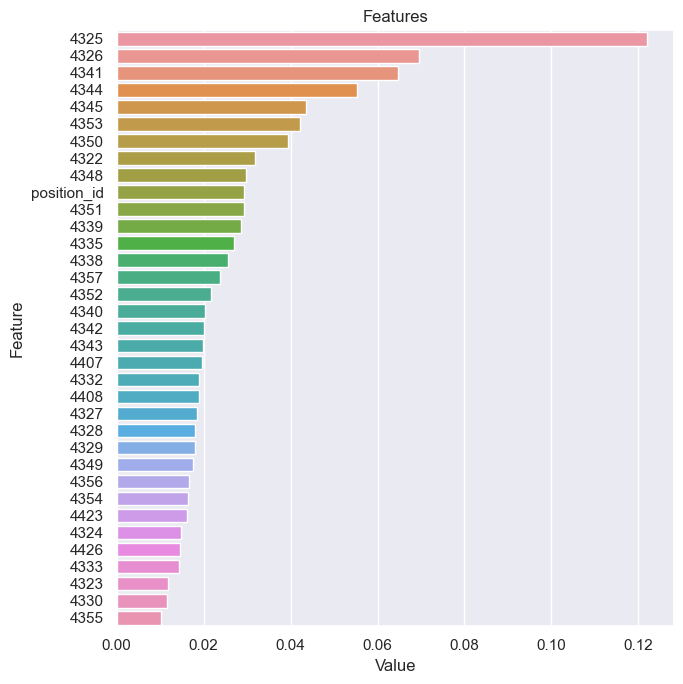

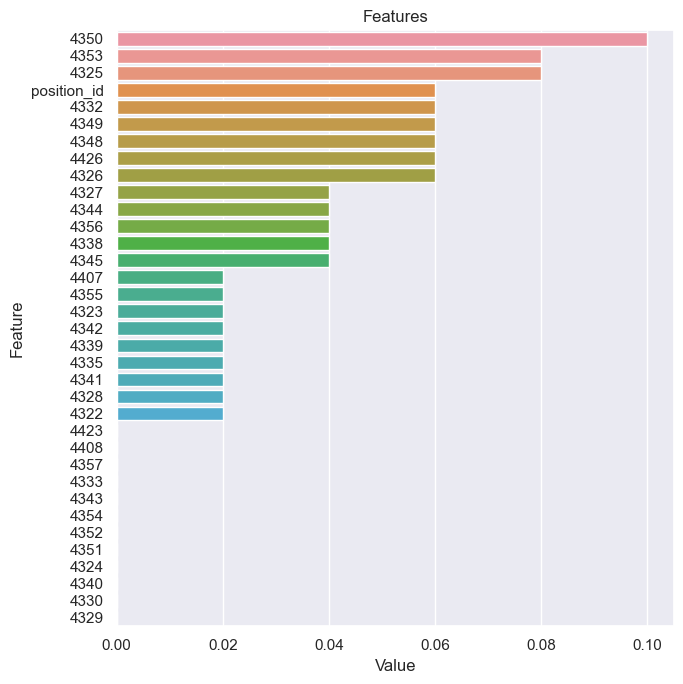

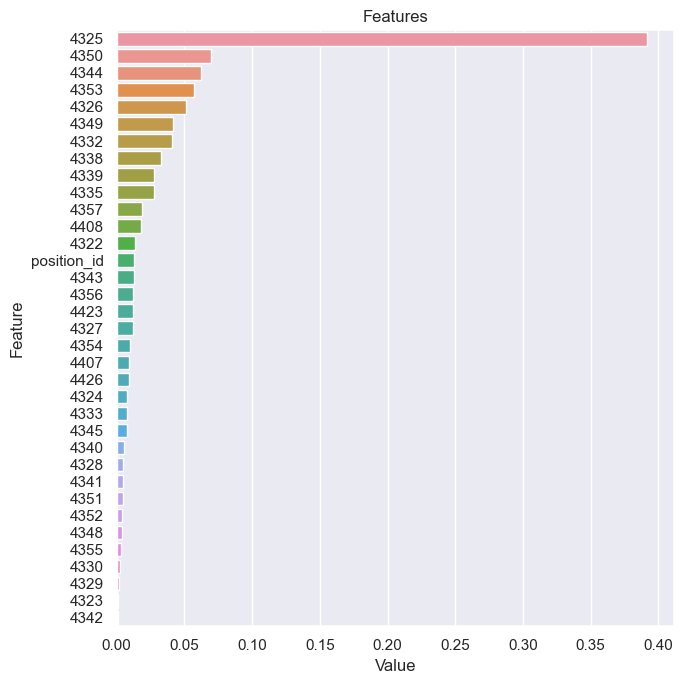

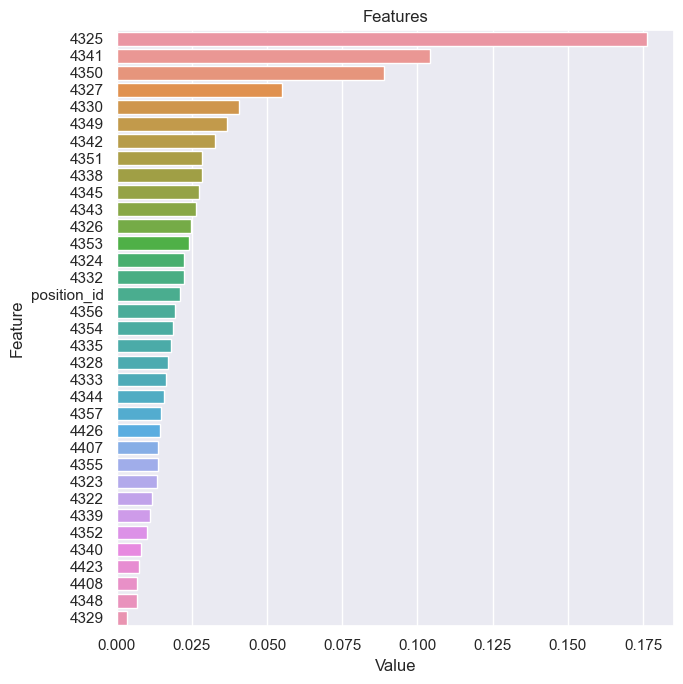

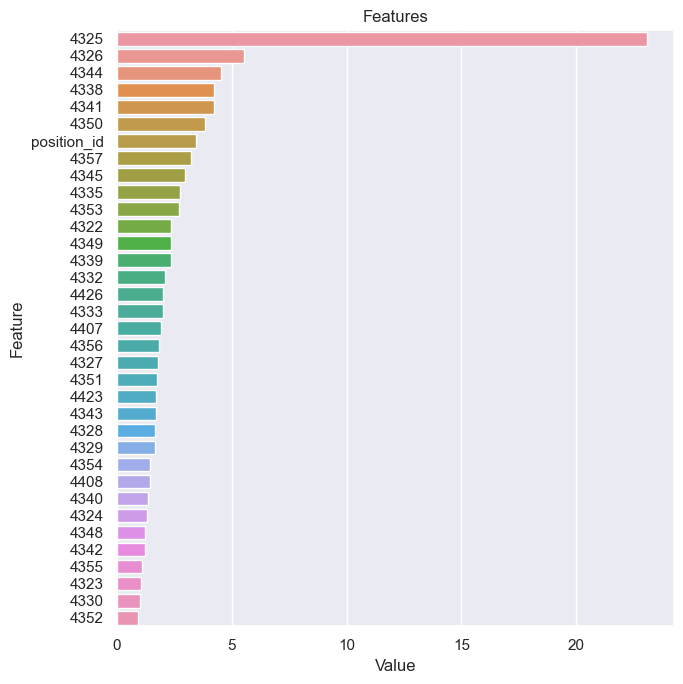

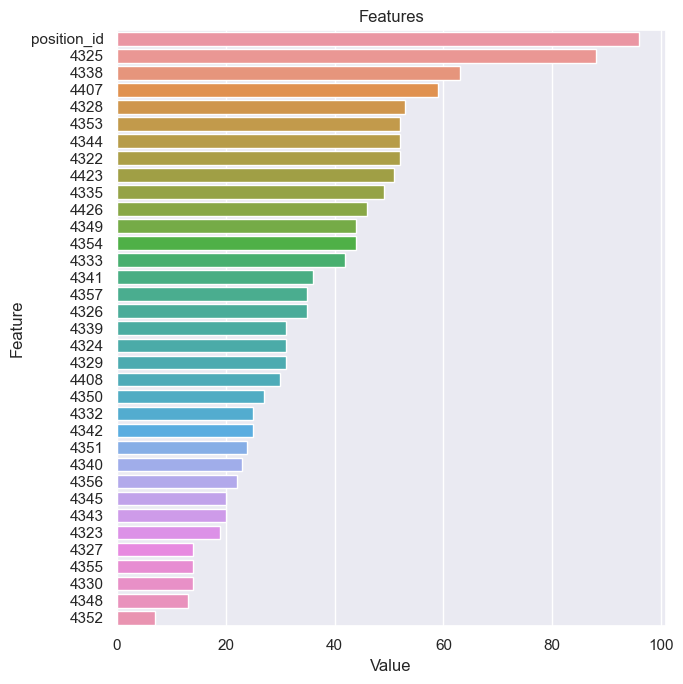

In [25]:
for name, model in models[3:]:
    model=model.fit(X,y)
    plot_importance(model, X)